For this project, I will be looking at the DataFrame 'vehicles_us.csv'. This particular DataFrame is going to be going over advertising points that can help sell or buy a car based on things such as fuel economy, transmission type, and size of vehicle and whether or not these can make a difference in the selling process!

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('../vehicles_us.csv')
display(df.head())
print(df.info())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


First we can see that after pulling information on the data, there is a lot of good information that will help us determine what are key components that will help us with selling or potentially buying a car! We can also see that there is a lot of missing data here. Let's clean that up!


In [36]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [46]:
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
df['is_4wd'] = df['is_4wd'].fillna(0).astype(int)
df['paint_color'] = df['paint_color'].fillna('unknown')
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))
df['odometer'] = df.groupby('model')['odometer'].transform(lambda x: x.fillna(x.median()))
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 price                0
model_year           0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
transmission         0
type                 0
paint_color          0
is_4wd               0
date_posted          0
days_listed          0
transmission_type    0
dtype: int64


In [38]:
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 0


In [39]:
df['type'] = df['type'].replace({'pickup': 'truck', 'truck': 'truck', 'van': 'van', 'mini-van': 'van'})

print(df['type'].value_counts())

type
truck          19341
SUV            12405
sedan          12154
coupe           2303
van             1794
wagon           1541
hatchback       1047
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64


/var/folders/wb/gkvqn3453y1fvdkz41wlyk8m0000gn/T/ipykernel_1584/2382512835.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


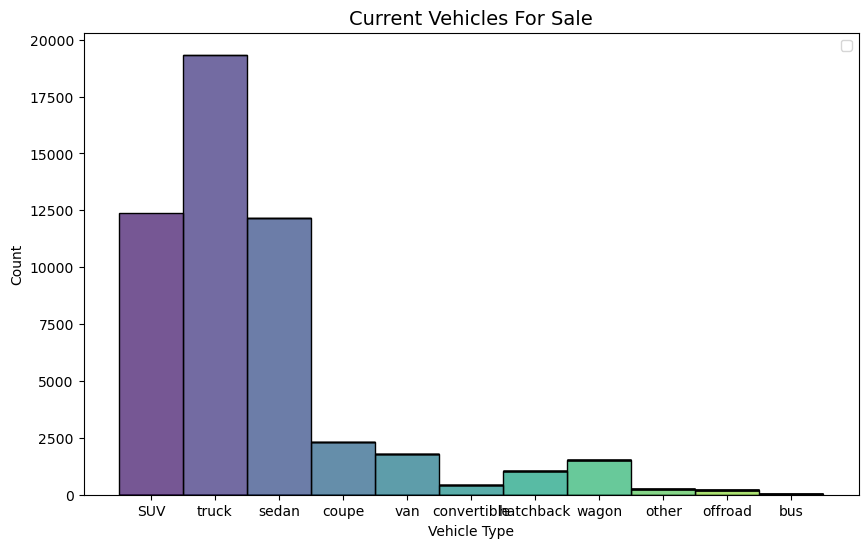

In [40]:
df_type = df[['type', 'days_listed']].dropna()  

plt.figure(figsize=(10, 6))
sns.histplot(data=df_type, x='type', bins=20, hue='type', multiple='stack', palette='viridis')
plt.title("Current Vehicles For Sale", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.legend()
plt.show()

Above we have all the vehicles for sale in the DataFrame! There are a ton of trucks for sale right now, with SUV's and Sedans tied for second place!

In [41]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers = detect_outliers(df, 'price')
print("\nOutliers detected in 'price':", outliers.shape[0])



Outliers detected in 'price': 1646


Interesting!! After filling in all of the empty spots in the data and checking for duplicates, We see that there are a lot of outliers in the price region! Let's see what this looks like when comparing price with the condition of the vehicles being sold!


/var/folders/wb/gkvqn3453y1fvdkz41wlyk8m0000gn/T/ipykernel_1584/3946866347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='condition', y='price', data=df, jitter=True, alpha=0.5, palette="viridis")


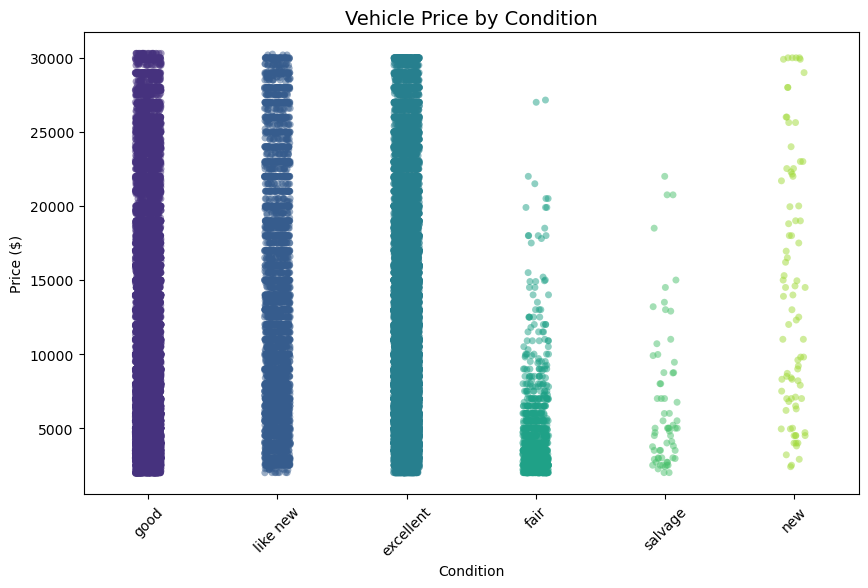

In [42]:
df = df[(df['price'] >= df['price'].quantile(0.05)) & (df['price'] <= df['price'].quantile(0.95))]

plt.figure(figsize=(10, 6))
sns.stripplot(x='condition', y='price', data=df, jitter=True, alpha=0.5, palette="viridis")
plt.title('Vehicle Price by Condition', fontsize=14)
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

Interesting to see that the most outliers are in the Fair, Salvage, and New categories! This could absolutely help someone looking to possibly sell or buy a car! Let's dive deeper on the seller side of things! Do V8's sell better and quicker then 4 cylinders? Does the Transmission play a role in selling a car? Let's take a look!

/var/folders/wb/gkvqn3453y1fvdkz41wlyk8m0000gn/T/ipykernel_1584/3288809811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission_type', y='days_listed', data=df, palette="coolwarm")


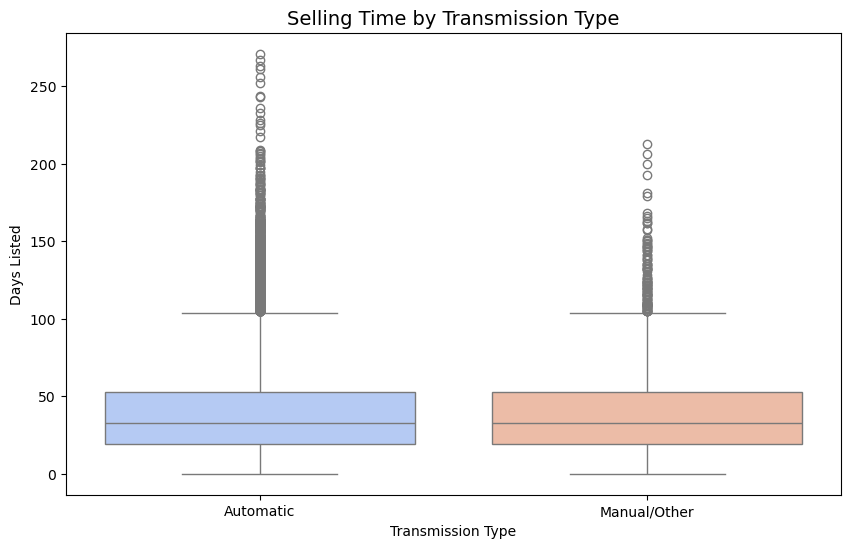

/var/folders/wb/gkvqn3453y1fvdkz41wlyk8m0000gn/T/ipykernel_1584/3288809811.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinders', y='days_listed', data=df_filtered, palette="viridis")


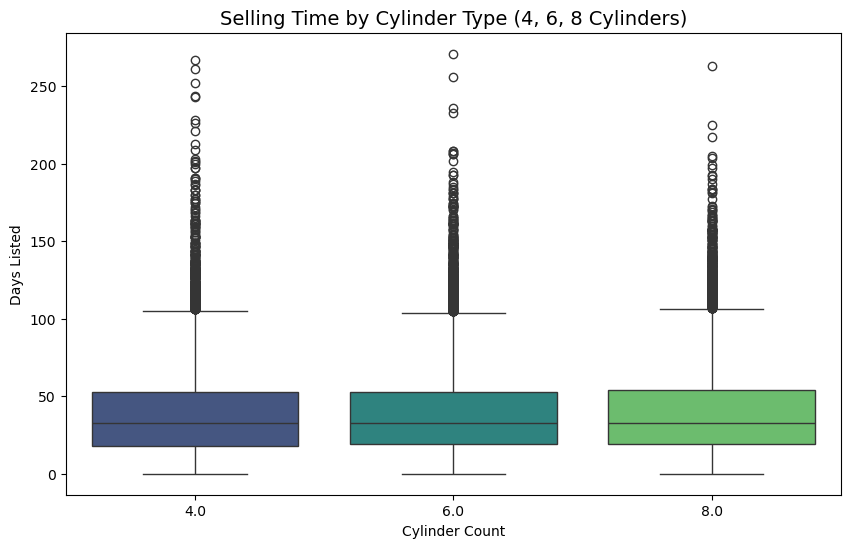

In [43]:
df['days_listed'] = pd.to_numeric(df['days_listed'], errors='coerce')

df['transmission_type'] = df['transmission'].apply(lambda x: 'Automatic' if 'automatic' in x.lower() else 'Manual/Other')

plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission_type', y='days_listed', data=df, palette="coolwarm")
plt.title('Selling Time by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type')
plt.ylabel('Days Listed')
plt.show()

df_filtered = df[df['cylinders'].isin([4, 6, 8])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='days_listed', data=df_filtered, palette="viridis")
plt.title('Selling Time by Cylinder Type (4, 6, 8 Cylinders)', fontsize=14)
plt.xlabel('Cylinder Count')
plt.ylabel('Days Listed')
plt.show()

As we can see that even though there are not as many manual transmissions as there are automatic transmissions, It seems that there is still a signifigance as the amount of time to sell a manual transmission vehicle! when looking at the non outliers we see that automatics and manual transmissions pretty much sell at the same rate, but with those outliers we see that the longer the car is on the market the better for the manual transmission sellers! When it comes to how many cylinders you have everyone has a pretty fair shot at being bought! that being said the outliers show that the V6 engine will sell that fastest!

Now that we have looked at some of the things that can help with selling cars, Let's explore the buying side! What things on a vehicle help it sell? We already know that the V6 engine is popular and doesn't last as long the longer its on the market, We also know that manual transmission get bought up faster then the automatic vehicles do. What about this like 4WD or model year. Can these things effect the sale of a car? Gasoline vs diesel or maybe even the size of the vehicle! Let's check out the numbers!!

/var/folders/wb/gkvqn3453y1fvdkz41wlyk8m0000gn/T/ipykernel_1584/278003259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='days_listed', data=df_fuel, palette="pastel")


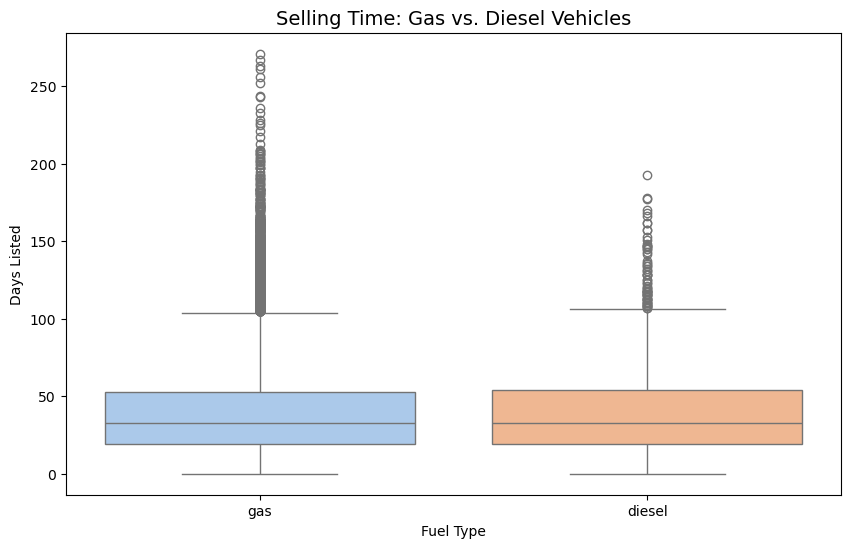

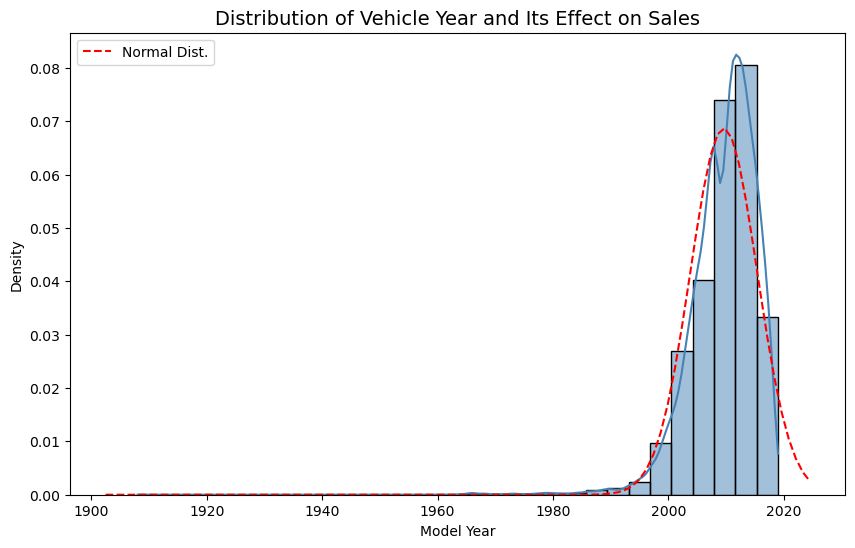

In [44]:
df_fuel = df[df['fuel'].isin(['gas', 'diesel'])]  

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='days_listed', data=df_fuel, palette="pastel")
plt.title('Selling Time: Gas vs. Diesel Vehicles', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('Days Listed')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['model_year'].dropna(), kde=True, bins=30, stat="density", color='steelblue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mean = df['model_year'].mean()
std = df['model_year'].std()
plt.plot(x, norm.pdf(x, mean, std), color='red', linestyle='dashed', label="Normal Dist.")
plt.title("Distribution of Vehicle Year and Its Effect on Sales", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Density")
plt.legend()
plt.show()

From the graphs above we can gather three very key things! 1. There are more gas vehicles then diesel, yet diesel appears to sell faster then a lot of gas engined vehicles. 2. Our median age of vehicel being bought currently is in and around the year 2010! 3. There is a large amount of vehicles for sale made between the year of 2010 and 2020. Let's look at one other thing that a lot of people could worry about! How many miles are on the vehicle.

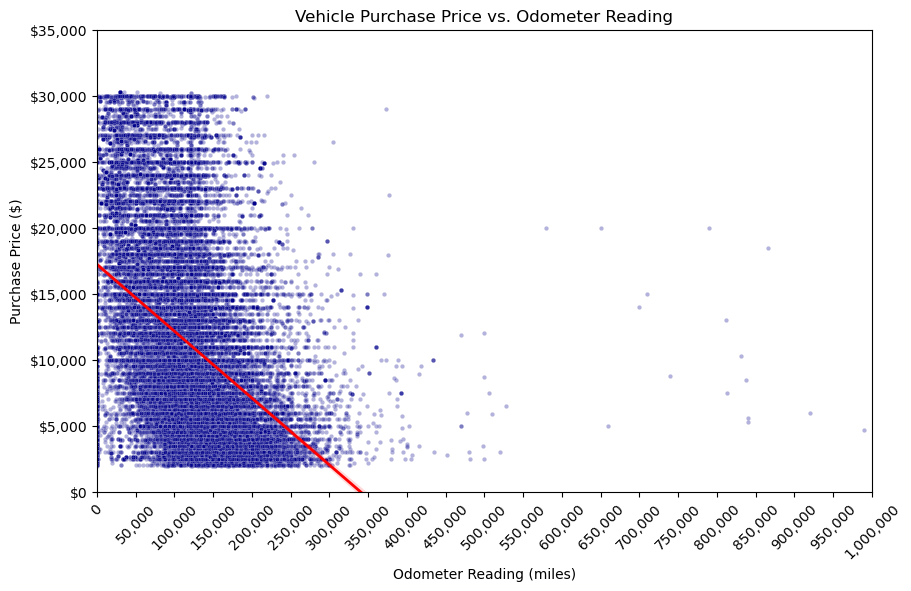

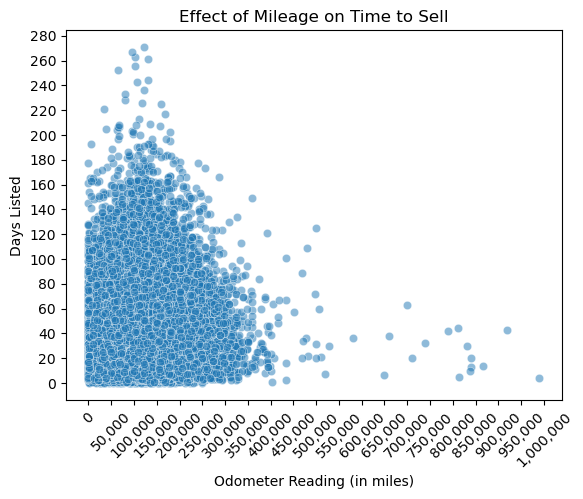

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['odometer'], y=df['price'], alpha=0.3, s=10, color="darkblue")
sns.regplot(x=df['odometer'], y=df['price'], scatter=False, color='red', line_kws={"linewidth": 2})
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Purchase Price ($)')
plt.title('Vehicle Purchase Price vs. Odometer Reading')
max_miles = df['odometer'].max()
max_price = df['price'].max()
plt.xlim(0, max_miles)
plt.ylim(0, max_price)
plt.xticks(np.arange(0, max_miles + 50000, 50000), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.yticks(np.arange(0, max_price + 5000, 5000))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}')) 

plt.show()


sns.scatterplot(x=df['odometer'], y=df['days_listed'], alpha=0.5) 
plt.xlabel('Odometer Reading (in miles)')
plt.ylabel('Days Listed')
plt.title('Effect of Mileage on Time to Sell')
plt.xticks(np.arange(0, max_miles + 20000, 20000), rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  
max_days = df['days_listed'].max()
plt.yticks(np.arange(0, max_days + 10, 20))
max_miles = df['odometer'].max()
plt.xticks(np.arange(0, max_miles + 50000, 50000))


plt.show()

There is a lot of data here! Let's break it down together. As we can see in the first graph, as the vehicle gains mileage as expected the cost of the vehicle will drop. obviouslt as we can see in the data, there are outliers in everything! this is great knowledge for us to see that just because you have other miles doesn't mean that you are out of luck in selling for good money!!

In conclusion, according to the data there are a lot of items that can effect the sale of a vehicle. That being said lets recap a lot of the good practices that should be followed based on the above data that has been sifted through. First, it is important to remember that some of the biggest factors in buying or selling a car is the total profit at the end of the deal. Vehicles with fewer miles and between the year 2010 to 2015 are selling the best! Second, when it comes to how many cylinder the vehicle has, there isn't much of a differece between them until they sit on your lot for a while...in this instance the data shows that you wwould want to get 6 cylinder vehicles as they sell quicker then the 4 and 8 cylinders. Finally, The data shows that when a vehicle has been sitting on your lot for a while and it has a manual transmission, it is more likely to be sold before an automatic transmission! If you keep the following in mind you will have no issues raising the bottom line of your business and continue to grow your business!